**Part 1:**
1. Load the dataset and preprocess the reviews.

a. Convert all text to lowercase.

b. Remove non-alphabetic characters (punctuation).

c. Tokenize the reviews and remove common stopwords.

d. Apply stemming to reduce words to their root form.


---



In [3]:
import pandas as pd

path = "/content/drive/MyDrive/Concept and technologies of AI/IMDB Dataset.csv"

df = pd.read_csv(path)

print(df.head())
print(df.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
df['clean_review'] = df['review'].apply(preprocess_text)

print(df[['review','clean_review','sentiment']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                        clean_review sentiment  
0  one review mention watch oz episod youll hook ...  positive  
1  wonder littl product br br film techniqu unass...  positive  
2  thought wonder way spend time hot summer weeke...  positive  
3  basic there famili littl boy jake think there ...  negative  
4  petter mattei love time money visual stun film...  positive  


2. Split the dataset into training and testing sets (80% training, 20% testing).

---



In [5]:
from sklearn.model_selection import train_test_split

X = df['clean_review']
y = df['sentiment'].map({'positive':1, 'negative':0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(len(X_train), len(X_test))

40000 10000


3. Use a Naive Bayes classifier to classify the reviews into positive and negative categories.

a. Implement a Bag-of-Words model using CountVectorizer.

b. Train the Naive Bayes classifier using the training set.

---



In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_bow, y_train)

y_pred = nb_classifier.predict(X_test_bow)

**Part 2:**
1. Evaluate the performance of the model using the following metrics:

a. Accuracy

b. Precision, Recall, and F1-score

c. Confusion Matrix

d. ROC-AUC Score

---



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.8524
Precision: 0.8664725457570716
Recall: 0.8332
F1-score: 0.8495106035889071
Confusion Matrix:
 [[4358  642]
 [ 834 4166]]
ROC-AUC Score: 0.8524


# **3.1 Feature Selection using Wrapper Methods.**
**Part 1: Data Loading and Preprocessing**

1. Load the Breast Cancer Prognostic Dataset.
2. Dataset is available in Drive.
3. Perform basic exploratory data analysis (EDA) to understand the dataset:

• Summarize key statistics for each feature.

• Check for missing values and handle them appropriately.

4. Split the dataset into training (80%) and testing (20%) sets.

---



In [9]:
import pandas as pd

path = "/content/drive/MyDrive/Concept and technologies of AI/wpbc.data"
data = pd.read_csv(path, header=None)

column_names = [
    "id", "status", "time",
    "mean_radius", "mean_texture", "mean_perimeter", "mean_area",
    "mean_smoothness", "mean_compactness", "mean_concavity",
    "mean_concave_points", "mean_symmetry", "mean_fractal_dimension",
    "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "worst_radius", "worst_texture", "worst_perimeter",
    "worst_area", "worst_smoothness", "worst_compactness",
    "worst_concavity", "worst_concave_points",
    "worst_symmetry", "worst_fractal_dimension",
    "tumor_size", "lymph_nodes"
]

data.columns = column_names
data.head()


,id,status,time,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,...,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,tumor_size,lymph_nodes
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [11]:
# Basic EDA
print("===== SUMMARY STATISTICS =====")
print(data.describe())

print("\n===== MISSING VALUES =====")
print(data.isnull().sum())

# Fill missing values for numeric columns only
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


===== SUMMARY STATISTICS =====
                 id        time  mean_radius  mean_texture  mean_perimeter  \
count  1.980000e+02  198.000000   198.000000     198.00000      198.000000   
mean   1.990469e+06   46.732323    17.412323      22.27601      114.856566   
std    2.889025e+06   34.462870     3.161676       4.29829       21.383402   
min    8.423000e+03    1.000000    10.950000      10.38000       71.900000   
25%    8.557452e+05   14.000000    15.052500      19.41250       98.160000   
50%    8.863390e+05   39.500000    17.290000      21.75000      113.700000   
75%    9.279958e+05   72.750000    19.580000      24.65500      129.650000   
max    9.411300e+06  125.000000    27.220000      39.28000      182.100000   

         mean_area  mean_smoothness  mean_compactness  mean_concavity  \
count   198.000000       198.000000        198.000000      198.000000   
mean    970.040909         0.102681          0.142648        0.156243   
std     352.149215         0.012522          0.

In [12]:
# Prepare target variable
data["status"] = data["status"].map({"N": 0, "R": 1})

# Drop ID column (not needed for prediction)
X = data.drop(["id", "status"], axis=1)
y = data["status"]

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (158, 33)
Testing set shape: (40, 33)


**Part 2: Apply a Wrapper Method**

1. Use Recursive Feature Elimination (RFE) with a Logistic Regression model to perform feature selection:

• Select the top 5 features that contribute the most to predicting the target variable.

• Visualize the ranking of features.

2. Train the Logistic Regression model using only the selected features.

---



===== FEATURE RANKING =====
                    Feature  Ranking
0                      time        1
5           mean_smoothness        1
6          mean_compactness        1
16           compactness_se        1
17             concavity_se        1
12               texture_se        2
13             perimeter_se        3
18        concave_points_se        4
32              lymph_nodes        5
21             worst_radius        6
1               mean_radius        7
24               worst_area        8
14                  area_se        9
20     fractal_dimension_se       10
10   mean_fractal_dimension       11
25         worst_smoothness       12
7            mean_concavity       13
29           worst_symmetry       14
19              symmetry_se       15
27          worst_concavity       16
26        worst_compactness       17
30  worst_fractal_dimension       18
3            mean_perimeter       19
23          worst_perimeter       20
2              mean_texture       21
8       me

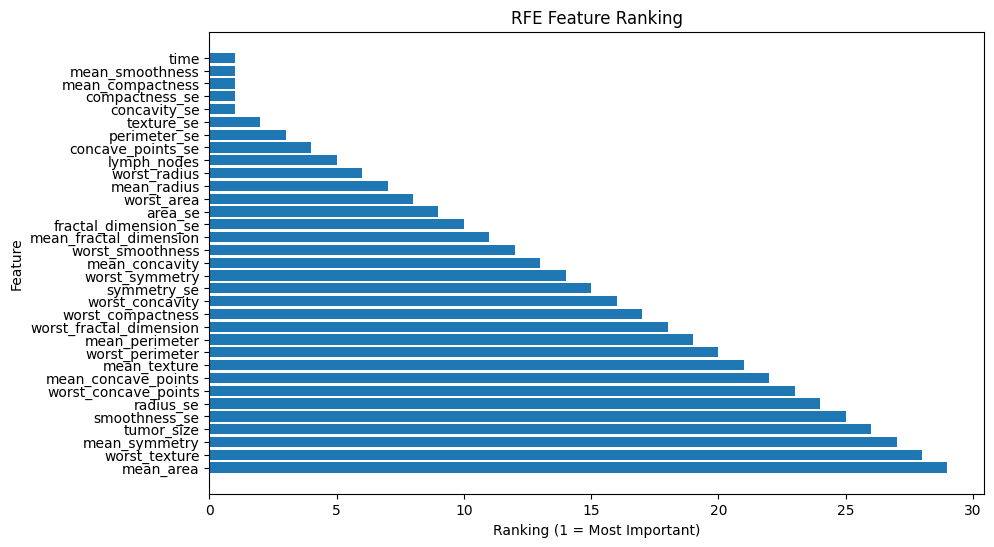


Top 5 selected features: ['time', 'mean_smoothness', 'mean_compactness', 'compactness_se', 'concavity_se']


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Replace '?' with NaN and convert to float
X_train = X_train.replace('?', np.nan).astype(float)
X_test = X_test.replace('?', np.nan).astype(float)

# Fill missing values with column mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Apply RFE to select top 5 features
rfe = RFE(estimator=logreg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

# Get feature rankings
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("===== FEATURE RANKING =====")
print(feature_ranking)

# Visualize feature rankings
plt.figure(figsize=(10,6))
plt.barh(feature_ranking['Feature'], feature_ranking['Ranking'])
plt.xlabel("Ranking (1 = Most Important)")
plt.ylabel("Feature")
plt.title("RFE Feature Ranking")
plt.gca().invert_yaxis()  # most important on top
plt.show()

# List top 5 features
top_features = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].tolist()
print("\nTop 5 selected features:", top_features)


In [17]:
from sklearn.linear_model import LogisticRegression

# Select top features from train/test sets
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Initialize Logistic Regression
logreg_top = LogisticRegression(max_iter=1000, random_state=42)

# Train model
logreg_top.fit(X_train_top, y_train)

# Check training and testing accuracy
train_acc = logreg_top.score(X_train_top, y_train)
test_acc = logreg_top.score(X_test_top, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")


Training Accuracy: 0.7532
Testing Accuracy: 0.8000


**Part 3: Model Evaluation**

1. Evaluate the model’s performance using the testing set:

• Metrics to calculate: Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

2. Compare the performance of the model trained on all features versus the model trained on the selected
features.

---



In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Model with all features
logreg_all = LogisticRegression(max_iter=1000, random_state=42)
logreg_all.fit(X_train, y_train)
y_pred_all = logreg_all.predict(X_test)
y_prob_all = logreg_all.predict_proba(X_test)[:,1]  # probability for ROC-AUC

# Model with top 5 features
y_pred_top = logreg_top.predict(X_test_top)
y_prob_top = logreg_top.predict_proba(X_test_top)[:,1]

# Evaluation metrics
def evaluate_model(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

# Evaluate both models
metrics_all = evaluate_model(y_test, y_pred_all, y_prob_all)
metrics_top = evaluate_model(y_test, y_pred_top, y_prob_top)

# Print comparison
print("===== MODEL PERFORMANCE =====\n")
print("Model trained on ALL features:")
for k,v in metrics_all.items():
    print(f"{k}: {v:.4f}")

print("\nModel trained on TOP 5 features:")
for k,v in metrics_top.items():
    print(f"{k}: {v:.4f}")


===== MODEL PERFORMANCE =====

Model trained on ALL features:
Accuracy: 0.8000
Precision: 0.5000
Recall: 0.5000
F1-Score: 0.5000
ROC-AUC: 0.7734

Model trained on TOP 5 features:
Accuracy: 0.8000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.7969


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Part 4: Experiment**
1. Experiment with different numbers of selected features (e.g., top 3, top 7).
2. Discuss how feature selection affects model performance.

---



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Numbers of features to experiment with
feature_numbers = [3, 5, 7]

results = {}

for n in feature_numbers:
    # Apply RFE
    rfe_exp = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
                  n_features_to_select=n)
    rfe_exp.fit(X_train_scaled, y_train)

    # Get top n features
    top_n_features = X_train.columns[rfe_exp.support_].tolist()

    # Train Logistic Regression on selected features
    X_train_n = X_train[top_n_features]
    X_test_n = X_test[top_n_features]
    model_n = LogisticRegression(max_iter=1000, random_state=42)
    model_n.fit(X_train_n, y_train)

    # Predictions
    y_pred_n = model_n.predict(X_test_n)
    y_prob_n = model_n.predict_proba(X_test_n)[:,1]

    # Evaluate
    metrics_n = {
        "Accuracy": accuracy_score(y_test, y_pred_n),
        "Precision": precision_score(y_test, y_pred_n),
        "Recall": recall_score(y_test, y_pred_n),
        "F1-Score": f1_score(y_test, y_pred_n),
        "ROC-AUC": roc_auc_score(y_test, y_prob_n)
    }

    results[f"Top {n} features"] = {"features": top_n_features, "metrics": metrics_n}

# Print results
for key, value in results.items():
    print(f"\n===== {key} =====")
    print("Selected Features:", value["features"])
    print("Metrics:")
    for metric, score in value["metrics"].items():
        print(f"{metric}: {score:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



===== Top 3 features =====
Selected Features: ['time', 'compactness_se', 'concavity_se']
Metrics:
Accuracy: 0.8000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.7969

===== Top 5 features =====
Selected Features: ['time', 'mean_smoothness', 'mean_compactness', 'compactness_se', 'concavity_se']
Metrics:
Accuracy: 0.8000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.7969

===== Top 7 features =====
Selected Features: ['time', 'mean_smoothness', 'mean_compactness', 'texture_se', 'perimeter_se', 'compactness_se', 'concavity_se']
Metrics:
Accuracy: 0.8500
Precision: 0.7500
Recall: 0.3750
F1-Score: 0.5000
ROC-AUC: 0.8359
